# scipy学习

### 积分

In [5]:
from scipy.integrate import quad,dblquad,nquad
import numpy as np
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

#### 一元积分

In [6]:
quad(lambda x:np.exp(-x), 0, np.inf)

(1.0000000000000002, 5.842606996763696e-11)

#### 二元积分

In [7]:
dblquad(lambda t,x: np.exp(-x*t)/t**3, 0, np.inf, lambda x:1, lambda x:np.inf)

(0.3333333333366853, 1.3888461883425516e-08)

#### n元积分

In [8]:
def f(x,y):
    return x*y
def bound_x(y):
    return [0, 1-2*y]
def bound_y():
    return [0, 0.5]
nquad(f, [bound_x,bound_y])

(0.010416666666666668, 4.101620128472366e-16)

### 优化器

#### 一元函数最小值

In [16]:
from scipy.optimize import minimize
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0+(1-x[:-1])**2.0)
x0 = np.array([1.3,0.7,0.8,1.9,1.2])
res = minimize(rosen, x0, method='nelder-mead', options={"xtol":1e-8, "disp": True})
res
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


 final_simplex: (array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.00000001, 1.00000001],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 0.99999999]]), array([4.86115343e-17, 7.65182843e-17, 8.11395684e-17, 8.63263255e-17,
       8.64080682e-17, 2.17927418e-16]))
           fun: 4.861153433422115e-17
       message: 'Optimization terminated successfully.'
          nfev: 571
           nit: 339
        status: 0
       success: True
             x: array([1., 1., 1., 1., 1.])

array([1., 1., 1., 1., 1.])

#### 约束条件下函数最小值

In [40]:
def func(x):
    return -(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)
def func_deriv(x):
    dfdx0 = -(-2*x[0] + 2*x[1] + 2)
    dfdx1 = -(2*x[0] - 4*x[1])
    return np.array([dfdx0,dfdx1])
cons = ({"type":"eq", 
         "fun":lambda x:np.array([x[0]**3-x[1]]), 
         "jac":lambda x:np.array([3.0*(x[0]**2.0), -1.0]),
         'type':'ineq', 
         'fun':lambda x:np.array([x[1]-1]), 
         'jac':lambda x:np.array([0.0, 1.0])})
res = minimize(func, 
               [-1.0,1.0], 
               jac=func_deriv, 
               constraints=cons, 
               method='SLSQP',
               options={'disp':True})
res

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2.0
            Iterations: 2
            Function evaluations: 3
            Gradient evaluations: 2


     fun: -2.0
     jac: array([-0.0000000e+00,  8.8817842e-14])
 message: 'Optimization terminated successfully.'
    nfev: 3
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([2., 1.])

#### 优化器求根

In [41]:
from scipy.optimize import root
def fun(x):
    return x+2*np.cos(x)
sol = root(fun, 0.1)
sol.x,sol.fun # 根和值

(array([-1.02986653]), array([0.]))

#### 插值计算

<Figure size 432x288 with 0 Axes>

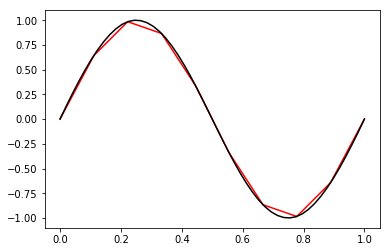

array([ 0.00000000e+00,  1.31268478e-01,  2.58058896e-01,  3.79095818e-01,
        4.93103803e-01,  5.98807414e-01,  6.94931212e-01,  7.80199759e-01,
        8.53337617e-01,  9.13069347e-01,  9.58119510e-01,  9.87213058e-01,
        9.99462682e-01,  9.95096409e-01,  9.74541587e-01,  9.38225564e-01,
        8.86575689e-01,  8.20078818e-01,  7.39913600e-01,  6.47705004e-01,
        5.45085433e-01,  4.33687295e-01,  3.15143957e-01,  1.91245093e-01,
        6.41081509e-02, -6.41081509e-02, -1.91245093e-01, -3.15143957e-01,
       -4.33687295e-01, -5.45085433e-01, -6.47705004e-01, -7.39913600e-01,
       -8.20078818e-01, -8.86575689e-01, -9.38225564e-01, -9.74541587e-01,
       -9.95096409e-01, -9.99462682e-01, -9.87213058e-01, -9.58119510e-01,
       -9.13069347e-01, -8.53337617e-01, -7.80199759e-01, -6.94931212e-01,
       -5.98807414e-01, -4.93103803e-01, -3.79095818e-01, -2.58058896e-01,
       -1.31268478e-01, -2.44929360e-16])

In [43]:
from pylab import *
from scipy.interpolate import interp1d
x = np.linspace(0, 1, 10)
y = np.sin(2*np.pi*x)
li = interp1d(x, y, kind='cubic')
x_new = np.linspace(0, 1, 50)
y_new = li(x_new)
figure()
plot(x, y, 'r')
plot(x_new, y_new, 'k')
show()
y_new

#### 线性计算和矩阵分解

In [45]:
from scipy import linalg as lg
arr = np.array([[1,2], [3,4]])
lg.det(arr) # 行列式
lg.inv(arr) # 逆矩阵
b = np.array([6,14]) 
lg.solve(arr,b) # 解线性方程组
lg.eig(arr) # 特征向量与特征值

-2.0

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

array([2., 2.])

(array([-0.37228132+0.j,  5.37228132+0.j]), array([[-0.82456484, -0.41597356],
        [ 0.56576746, -0.90937671]]))

In [46]:
lg.lu(arr) # LU分解
lg.qr(arr) # QR分解
lg.svd(arr) # 奇异值分解
lg.schur(arr) # schur分解

(array([[0., 1.],
        [1., 0.]]), array([[1.        , 0.        ],
        [0.33333333, 1.        ]]), array([[3.        , 4.        ],
        [0.        , 0.66666667]]))

(array([[-0.31622777, -0.9486833 ],
        [-0.9486833 ,  0.31622777]]), array([[-3.16227766, -4.42718872],
        [ 0.        , -0.63245553]]))

(array([[-0.40455358, -0.9145143 ],
        [-0.9145143 ,  0.40455358]]),
 array([5.4649857 , 0.36596619]),
 array([[-0.57604844, -0.81741556],
        [ 0.81741556, -0.57604844]]))

(array([[-0.37228132, -1.        ],
        [ 0.        ,  5.37228132]]), array([[-0.82456484, -0.56576746],
        [ 0.56576746, -0.82456484]]))